Exploring Netflix Data 📺

In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [96]:
netflix=pd.read_csv("netflix_titles.csv")

Khám phá và chuẩn bị dữ liệu (Data Exploration & Preprocessing)
Thu thập và tải dữ liệu:
Import dữ liệu vào môi trường làm việc (Pandas).
Kiểm tra dữ liệu:
Số hàng, cột và các đặc điểm tổng quan của dữ liệu.
Tìm hiểu về các giá trị thiếu (NaN), kiểm tra độ sạch của dữ liệu.
Xử lý dữ liệu thiếu:
Sử dụng fillna() hoặc loại bỏ dữ liệu thiếu tùy thuộc vào tình huống.
Chuyển đổi dữ liệu:
Xử lý định dạng ngày tháng, thể loại nhiều lựa chọn, chuyển đổi văn bản thành dạng dễ phân tích.

In [97]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
print("Số hàng và cột: ", netflix.shape)

Số hàng và cột:  (8807, 12)


In [14]:
print(netflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [15]:
print("Số lượng giá trị thiếu trong từng cột:\n", netflix.isna().sum())

Số lượng giá trị thiếu trong từng cột:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


C:\Users\NGUYET VIEN\AppData\Local\Temp\ipykernel_42804\1045844293.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




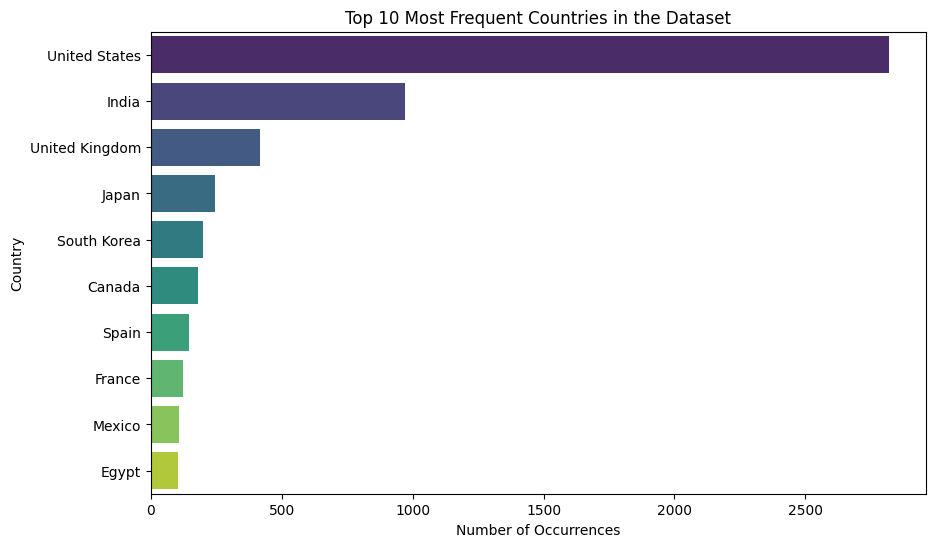

In [98]:
# Biểu đồ bar hiển thị số lượng nội dung theo quốc gia
top_10_countries = netflix['country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="viridis")
plt.title('Top 10 Most Frequent Countries in the Dataset')
plt.xlabel('Number of Occurrences')
plt.ylabel('Country')
plt.show()

In [99]:
netflix = netflix.fillna("-")

In [100]:
print(netflix.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [101]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [102]:
# Đếm số lượng nội dung Mỹ và các quốc gia khác
us_content = netflix[netflix['country'] == 'United States'].shape[0]
international_content = netflix[netflix['country'] != 'United States'].shape[0]

print(f"Số lượng nội dung Mỹ: {us_content}")
print(f"Số lượng nội dung quốc tế: {international_content}")

Số lượng nội dung Mỹ: 2818
Số lượng nội dung quốc tế: 5989


. What is the distribution of content types on Netflix?

In [103]:
netflix["type"].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [104]:
fig = px.pie(netflix, values=netflix["type"].value_counts().values, names=netflix["type"].value_counts().index)

fig.update_layout(title="Distribution of Content Type", plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='black', font=dict(color='white'))

fig.show()

What are the highest release years for TV shows and movies in the Netflix dataset?

In [46]:
netflix["release_year"].unique()


array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [47]:
netflix["release_year"].value_counts()


release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1961       1
1925       1
1959       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64

In [48]:
fig = px.bar(x=netflix["release_year"].value_counts().index, 
             y=netflix["release_year"].value_counts().values, 
             color=netflix["release_year"].value_counts().index)

# Update layout with customized title, axis labels, and background colors

fig.update_layout(
    title={
        'text': "Highest Release Years for TV Shows and Movies",
        'font': {'color': 'white'}
    },
    xaxis_title={
        'text': "Release Year",
        'font': {'color': 'white'}
    },
    yaxis_title={
        'text': "Count",
        'font': {'color': 'white'}
    },
    plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='black',         
    font=dict(color='white')       
)

In [49]:
grouped_data = netflix.groupby(['release_year', 'type']).size().reset_index(name='count')

fig = px.bar(grouped_data, x='release_year', y='count', color='type',
             title="Highest Release Years for TV Shows and Movies",
             labels={'release_year': "Release Year", 'count': "Count", 'type': "Type"},
             color_discrete_map={'Movie': 'blue', 'TV Show': 'green'})
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)', 
    paper_bgcolor='black',         
    font=dict(color='white')       
)
highest_release_year = grouped_data[grouped_data["count"] == grouped_data["count"].max()]["release_year"].iloc[0]
highest_type = grouped_data[grouped_data["count"] == grouped_data["count"].max()]["type"].iloc[0]
print(f"The highest type on the release year {highest_release_year} is {highest_type}.")
fig.show()

The highest type on the release year 2017 is Movie.


#showing the disturibition of Genres 

In [56]:
print(netflix['listed_in'].dtype)

float64


In [57]:
netflix['listed_in'] = netflix['listed_in'].astype(str)


In [73]:
# Split and explode
netflix['listed_in2'] = netflix['listed_in'].str.split(', ')

netflix_exploded = netflix.explode('listed_in2')


In [74]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]"


In [75]:
# Count categories
category_counts = netflix_exploded['listed_in2'].value_counts()


C:\Users\NGUYET VIEN\AppData\Local\Temp\ipykernel_42804\4146883862.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




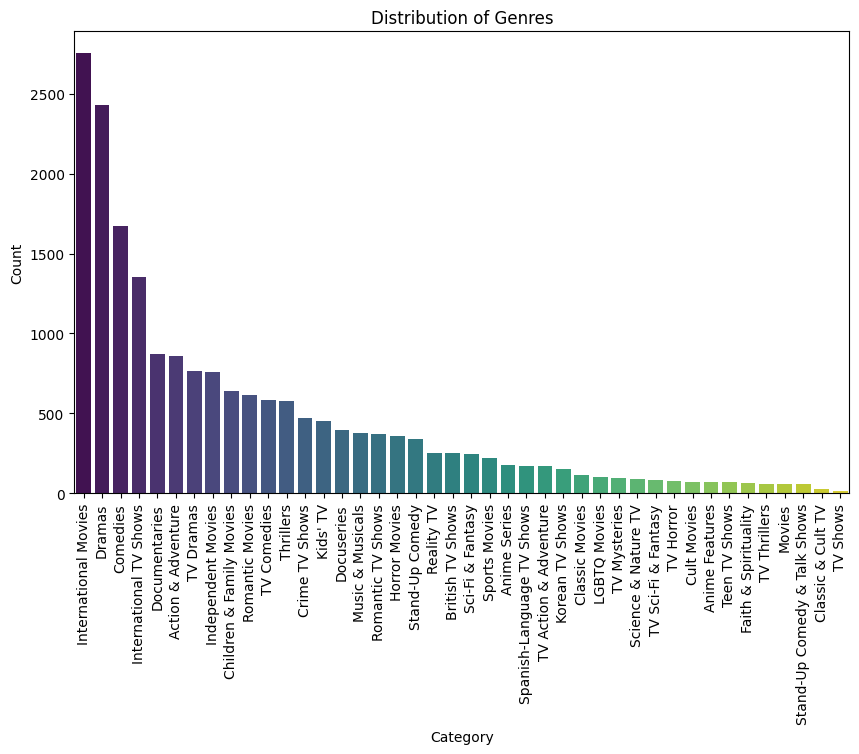

In [76]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [77]:
# showing the top 10 Cast Members
cast_series = netflix['cast'].str.split(',', expand=True).stack()
top_cast = cast_series.str.strip().value_counts().head(10)



C:\Users\NGUYET VIEN\AppData\Local\Temp\ipykernel_42804\3451024165.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




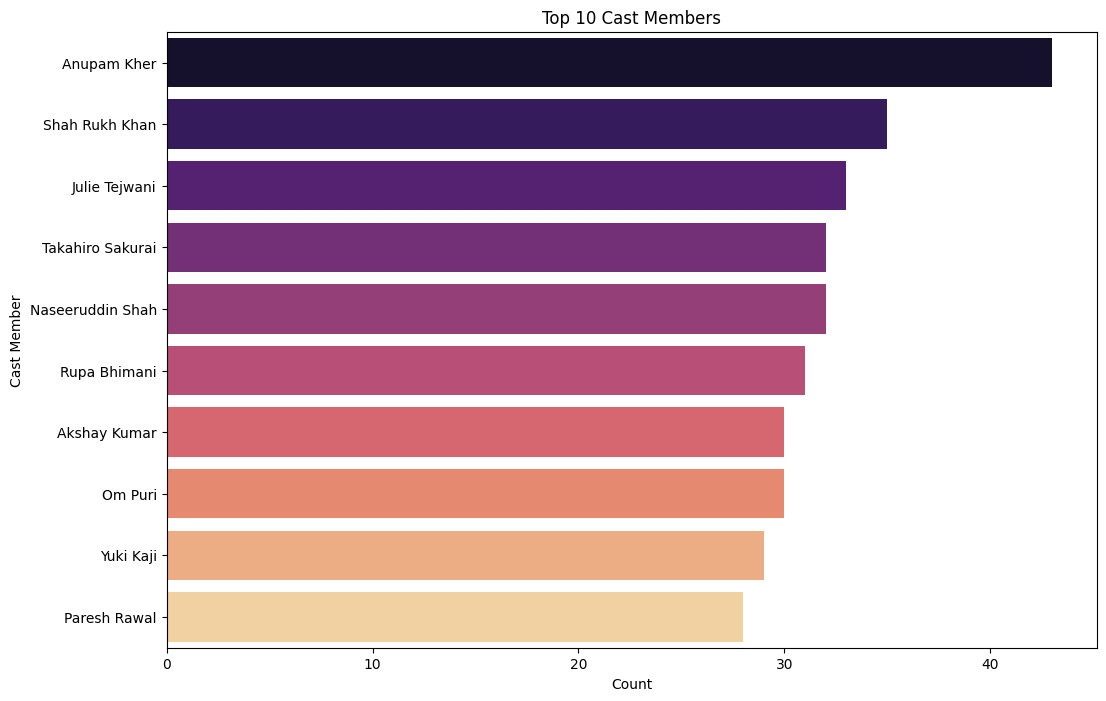

In [78]:
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cast.values, y=top_cast.index, palette='magma')
plt.title('Top 10 Cast Members')
plt.xlabel('Count')
plt.ylabel('Cast Member')
plt.show()

Phân tích thể loại theo quốc gia

In [28]:
# Tách các thể loại ra thành danh sách
netflix['listed_in'] = netflix['listed_in'].str.split(', ')

# Tạo một DataFrame với từng quốc gia và thể loại tương ứng
country_genre_netflix = netflix.explode('listed_in')

# Đếm số lượng thể loại theo quốc gia
country_genre_count = country_genre_netflix.groupby(['country', 'listed_in']).size().reset_index(name='genre_count')

# Xác định thể loại phổ biến nhất tại từng quốc gia
most_popular_genre_by_country = country_genre_count.loc[country_genre_count.groupby('country')['genre_count'].idxmax()]

# In ra một số kết quả
print(most_popular_genre_by_country.head())

Empty DataFrame
Columns: [country, listed_in, genre_count]
Index: []


In [29]:
fig = px.choropleth(country_content_count, 
                    locations='country', 
                    locationmode='country names', 
                    color='content_count', 
                    title='Sự phân bố nội dung theo quốc gia trên Netflix',
                    labels={'content_count': 'Số lượng nội dung'},
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [ ]:
# Chuyển đổi cột 'date_added' thành định dạng ngày tháng
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')



In [ ]:
# Lọc dữ liệu TV Shows và Movies
netflix = netflix.dropna(subset=['date_added', 'type'])

In [ ]:
# Thêm cột năm phát hành
netflix['release_year'] = netflix['date_added'].dt.year

In [ ]:
# Phân tích số lượng TV Shows và Movies theo năm
annual_counts = netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

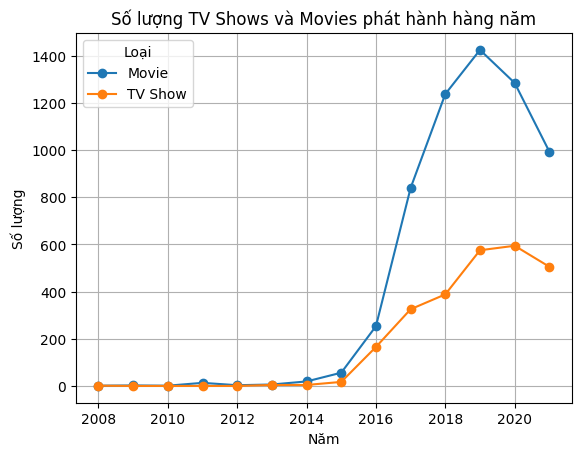

In [ ]:
# Vẽ biểu đồ so sánh số lượng TV Shows và Movies theo năm
plt.figure(figsize=(12, 6))
annual_counts.plot(kind='line', marker='o')
plt.title('Số lượng TV Shows và Movies phát hành hàng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.legend(title='Loại')
plt.grid(True)
plt.show()

Rating Count On Netflix

In [108]:
netflix['rating']=netflix['rating'].replace({'66 min':'Not Available','74 min':'Not Available','84 min':'Not Available'})

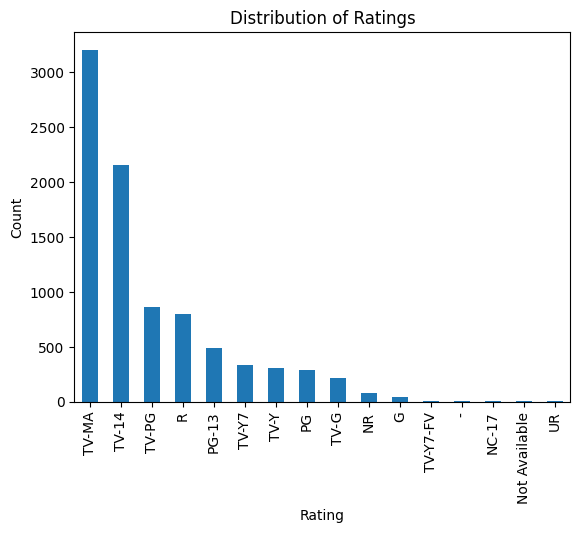

In [112]:
netflix['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

Thuật toán gợi ý phim

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Removing stopwords (Loại bỏ các từ dừng)
tfidf = TfidfVectorizer(stop_words='english')

In [121]:
# Tạo ma trận TF-IDF bằng cách khớp và chuyển đổi dữ liệu
tfidf_matrix = tfidf.fit_transform(netflix['description'])

In [122]:
# Xuất ra kích thước của ma trận TF-IDF
tfidf_matrix.shape

(8807, 18895)

In [123]:
# Import hàm linear_kernel để tính toán Cosine similarity
from sklearn.metrics.pairwise import linear_kernel

In [125]:
# Tính toán ma trận Cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#indices: Tạo một Series, trong đó chỉ số của netflix_overall được gán với tiêu đề của mỗi bộ phim (title), nhằm dễ dàng tìm kiếm phim dựa trên tên.
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()


In [126]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Lấy điểm tương đồng giữa phim đã chọn và tất cả các phim khác
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sắp xếp danh sách phim dựa trên điểm tương đồng, từ cao đến thấp
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Lấy 10 phim có điểm tương đồng cao nhất
    sim_scores = sim_scores[1:11]

    # Lấy chỉ số của các phim này
    movie_indices = [i[0] for i in sim_scores]

    # Trả về danh sách các phim tương tự nhất
    return netflix['title'].iloc[movie_indices]

In [127]:
get_recommendations('Friends')

7397        Manhattan Romance
3369          BoJack Horseman
964       Things Heard & Seen
5090                 Episodes
4096                Studio 54
6549               Dad's Army
4964        Trailer Park Boys
4265     Single Ladies Senior
682     Why Are You Like This
2403                   Menahi
Name: title, dtype: object

In [128]:
get_recommendations('Episodes')

3892                                          Street Food
6549                                           Dad's Army
6806                                              Friends
2506                                       Omar & Salma 2
3668                                                   4L
3412                                             Upstarts
7648    Oliver Stone's Untold History of the United St...
4535                            YG Future Strategy Office
8555                                    The Wedding Curse
8013                                              Shutter
Name: title, dtype: object